### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

chrun=pd.read_csv("churn.csv")


### Understanding the data

In [2]:
# checking if nulls in the data
chrun.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
chrun.head(120)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Data Manipulation

In [4]:
#droping the customerid because the customerID makes no sense
chrun1=chrun.drop(columns="customerID")

In [5]:
chrun1['gender'].replace(['Male','Female'],[1,0],inplace=True)
chrun1['Partner'].replace(['Yes','No'],[1,0],inplace=True)
chrun1['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
chrun1['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
chrun1['MultipleLines'].replace(['Yes','No','No phone service'],[1,0,0],inplace=True)
chrun1['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
chrun1['OnlineSecurity'].replace(['No','No internet service','Yes'],[0,0,1],inplace=True)
chrun1['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
chrun1['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
chrun1['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
chrun1['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
chrun1['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
chrun1['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
chrun1['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
chrun1['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
chrun1['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [15]:
chrun1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(1)
memory usage: 1.1+ MB


In [40]:
chrun1.head(50)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,0,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.5,1
6,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.4,0
7,0,0,0,0,10,0,0,1,1,0,0,0,0,0,0,0,1,29.75,301.9,0
8,0,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0


# Data Visualization

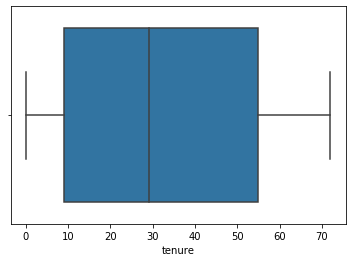

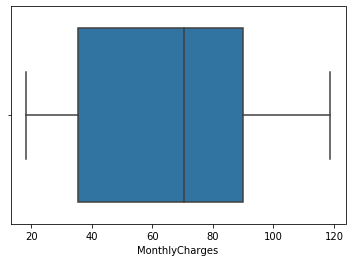

In [16]:
import matplotlib
import matplotlib.pyplot as plt


def run_boxplot(dataframe,column):
    plt.figure()
    sns.boxplot(x=dataframe[column])

tr_num = ["tenure","MonthlyCharges"]
for column in tr_num:    
    run_boxplot(chrun1,column)  

In [48]:
chrun1_corr = chrun1.corr(method = "pearson")
chrun1_corr.to_csv("chrun1Corr.csv")
#total charges and monthly charges are highly co related and we need to avoid it 
chrun1.pop('TotalCharges')

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
         ...   
7013     3756.4
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019        826
7020        239
7021      727.8
7022     7544.3
7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Leng

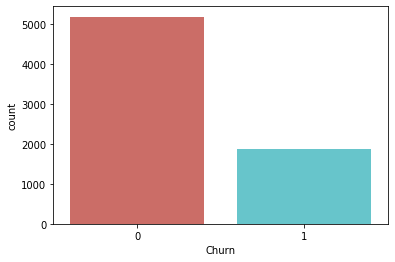

In [50]:
sns.countplot(x='Churn', data=chrun1,palette ='hls')
plt.show()

### Conclusion: What all did you understand from the above charts
# Data is not having the any outliers and no nulls values as the total charges was highly co relate to the montly charges and other 
# variables so the total carges is removed and going on with the other variables. 


##Data manupalation 

In [49]:
chrun1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(1), int64(18)
memory usage: 1.0 MB


In [51]:
from imblearn.over_sampling import SMOTE 

In [52]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
from sklearn.utils import resample
 
chrun1_majority = chrun1[chrun1['Churn']==0]
chrun1_minority = chrun1[chrun1['Churn']==1]
 
chrun1_minority_upsampled = resample(chrun1_minority,
replace=True,n_samples=5174,random_state=1)
chrun1_upsampled = pd.concat([chrun1_majority, chrun1_minority_upsampled])
 
chrun1_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

same number of samples as majority classe

Now the data is balanced to 50-50 ratio. 

### Implement Machine Learning Models

In [56]:
from sklearn.metrics import classification_report

train, test = train_test_split(chrun1_upsampled, test_size = 0.30)
 
train_y_upsampled = train['Churn'] 
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
X=train_x_upsampled
y=train_y_upsampled
logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X,y)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1555
           1       0.75      0.80      0.78      1550

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


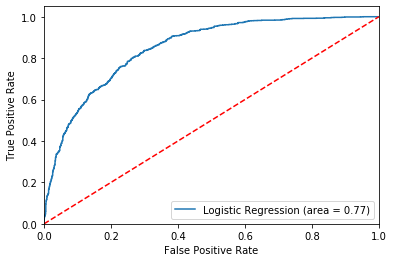

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tel_roc_auc = roc_auc_score(test_y_upsampled, test_y_pred_balanced)
fpr,tpr,thresholds = roc_curve(test_y_upsampled,logisticRegr_balanced.predict_proba(test_x_upsampled)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression (area = %0.2f)" % tel_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [62]:
#Getting confusion matrix
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(test_y_upsampled, test_y_pred_balanced)
print(conmat)

[[1137  418]
 [ 304 1246]]


In [67]:
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [68]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
dtree.fit(train_x_upsampled, train_y_upsampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [69]:
y_pred = dtree.predict(test_x_upsampled)

In [70]:
accuracy = metrics.accuracy_score(test_y_upsampled, test_y_pred_balanced)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.77


In [ ]:
#same cretirya using entropy and the accuracy 

### Model Evaluation

In [71]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dtree.fit(train_x_upsampled, train_y_upsampled)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [72]:
y_pred = dtree.predict(test_x_upsampled)

In [73]:
accuracy = metrics.accuracy_score(test_y_upsampled, test_y_pred_balanced)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.77


In [ ]:
#The accuracy for the model is being stable  

### Final Conclusions

In [ ]:
# Data was  unstructured data and where dicreat variable was target and hence i have  used Logistic regression was used.
# Where to convert the object the str to int I have used to to transfor the varable 0 and 1's.  Building the predicting model will 
# challenging and intersting to build. 